In [75]:
%matplotlib inline

In [76]:
from __future__ import print_function
from IPython.display import clear_output
import numpy as np
import pandas as pd
from IPython.display import clear_output
#import statsmodels.api as sm
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

updated_nba_players_data = "sample1_1980.csv"

updated_nba_players_data_df = pd.read_csv(updated_nba_players_data)

#ten_new=updated_nba_players_data_df.head(10)

#ten_new

updated_nba_players_data_df.describe()

Unnamed: 0         Year            G          AST         BLK  \
count  1153.000000  1153.000000  1153.000000  1153.000000  1153.00000   
mean   1920.784042  1984.695577    56.704250   149.568083    29.75889   
std    1087.627357     2.872908    26.302529   163.603494    44.51415   
min       2.000000  1980.000000     1.000000     0.000000     0.00000   
25%     978.000000  1982.000000    36.000000    33.000000     4.00000   
50%    1946.000000  1985.000000    68.000000    98.000000    13.00000   
75%    2821.000000  1987.000000    80.000000   209.000000    36.00000   
max    3809.000000  1989.000000    84.000000  1118.000000   369.00000   

                FG         STL          PTS          TRB      O_Index  \
count  1153.000000  1153.00000  1153.000000  1153.000000  1153.000000   
mean    243.513443    49.83608   615.960971   243.295750     7.289304   
std     213.072371    44.58970   542.765363   226.338642     4.975791   
min       0.000000     0.00000     0.000000     0.000000     0.000000   
25%      60.000000    14.00000   158.000000    63.000000     3.287500   
50%     190.000000    39.00000   476.000000   173.000000     6.246914   
75%     373.000000    76.00000   945.000000   368.000000    10.345679   
max     945.000000   263.00000  2520.000000  1190.000000    25.021818   

           D_Index  Overall_Index          PPG        ASTPG          RPG  \
count  1153.000000    1153.000000  1153.000000  1153.000000  1153.000000   
mean      1.846243       9.135547     9.242331     2.271499     3.705287   
std       1.272341       5.881555     6.430083     2.034406     2.731956   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.866667       4.310000     4.037037     0.838710     1.604938   
50%       1.493750       8.016071     7.772727     1.685714     2.876543   
75%       2.579310      12.989024    13.080000     3.089552     5.243902   
max       6.830882      29.906173    32.890909    13.634146    14.750000   

             BLKPG        STLPG         FGPG  
count  1153.000000  1153.000000  1153.000000  
mean      0.448852     0.764909     3.653723  
std       0.589593     0.531305     2.522582  
min       0.000000     0.000000     0.000000  
25%       0.086957     0.365854     1.608108  
50%       0.243902     0.666667     3.115942  
75%       0.571429     1.048780     5.172840  
max       4.612500     3.209877    12.563636

                            OLS Regression Results                            
Dep. Variable:          Overall_Index   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     1688.
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:23:15   Log-Likelihood:                -2279.6
No. Observations:                1153   AIC:                             4575.
Df Residuals:                    1145   BIC:                             4616.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6734      0.128     36.514      0.0

In [78]:
#params80=[]
#bse80=[]
#list_pred80=[]


In [79]:
#print('Parameters: ', result.params)
#print(result.params)

#params80=params0.tolist()
#type(list_pred80)

#print('Standard errors: ', result.bse)

#print('Predicted values: ', result.predict())
#predict=result.predict()
#list_pred80=predict.tolist()
#len(list_pred80)

In [80]:
print('Parameters: ', result.params)
print('Standard errors: ', result.bse)
print('Predicted values: ', result.predict())

Parameters:  Intercept    4.673399
FG           0.002596
STL          0.003125
G           -0.063634
BLK          0.004346
TRB          0.005332
AST          0.002781
PTS          0.008832
dtype: float64
Standard errors:  Intercept    0.127991
FG           0.002396
STL          0.002506
G            0.003223
BLK          0.001676
TRB          0.000470
AST          0.000611
PTS          0.000961
dtype: float64
Predicted values:  [ 3.15780665 11.91313069 20.5374244  ...  4.29911738  6.39750733
 10.83781178]


NameError: name 'x' is not defined

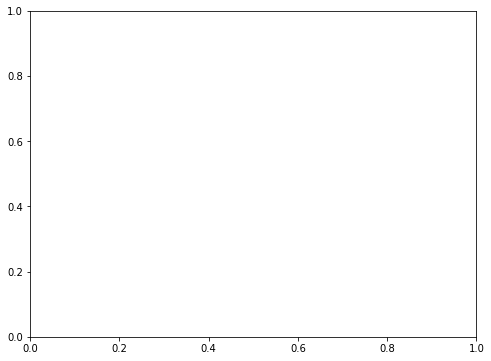

In [81]:
prstd, iv_l, iv_u = wls_prediction_std(result)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

In [ ]:

result = smf.ols('Overall_Index ~ (4.515242247+(FG*- + FG + BLK + TRB + AST + PTS', updated_nba_players_data_df).fit()
ten_new['yhat'] = result.fittedvalues
ten_new['resid'] = result.resid


result2 = sm.OLS(updated_nba_players_data_df['Overall_Index'], sm.add_constant(updated_nba_players_data_df[['FG', 'STL', 'BLK', 'TRB', 'AST', 'PTS']])).fit()
updated_nba_players_data_df['yhat2'] = result2.fittedvalues
updated_nba_players_data_df['resid2'] = result2.resid

# predict doesn't return pandas series and no index is available
updated_nba_players_data_df['predicted'] = result.predict(updated_nba_players_data_df)

print(updated_nba_players_data_df)

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, 'Year', 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');